In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
"""
constants:
x' = a*x - b1*x*y1 - b2*x*y2
y1' = c1*x*y1 - d1*y1 - e1 * y2
y2' = c2*x*y2 - d2*y2 - e2 * y1
"""
a, b1, b2 = 10, 1, 1.5
c1, c2, d1, d2 = 0.6, 0.5, 2.1, 2
e1, e2 = 0.15, 0.1 
eps = 0.1
food_max = 20

In [24]:
# right-sight function
def f(t, X):
    if np.abs(X[0]) > food_max: X[0] = food_max
    if np.abs(X[0]) < eps: X[0] = 0
    if np.abs(X[1]) < eps: X[1] = 0
    if np.abs(X[2]) < eps: X[2] = 0
    return np.array([a * X[0] - b1 * X[0] * X[1] - b2 * X[0] * X[2],
                     c1 * X[0] * X[1] - d1 * X[1] - e1 * X[2],
                     c2 * X[0] * X[2] - d2 * X[2] - e2 * X[1]])

In [25]:
# runge-kutta 4
def rg4(f, t0, t1, X0, h):
    N = int((t1 - t0) / h)
    OUT = np.zeros((N, X0.size))
    OUT[0] = X0
    T = np.linspace(t0, t1, N)
    for i in range(0, N - 1):
        k1 = f(T[i], OUT[i])
        k2 = f(T[i] + h / 3, OUT[i] + k1 * h / 3)
        k3 = f(T[i] + 2 * h / 3, OUT[i] - k1 * h / 3 + k2 * h)
        k4 = f(T[i] + h, OUT[i] + k1 * h - k2 * h + k3 * h)
        OUT[i + 1] = OUT[i] + h * (k1 / 8 + 3 * k2 / 8 + 3 * k3 / 8 + k4 / 8)
    return OUT

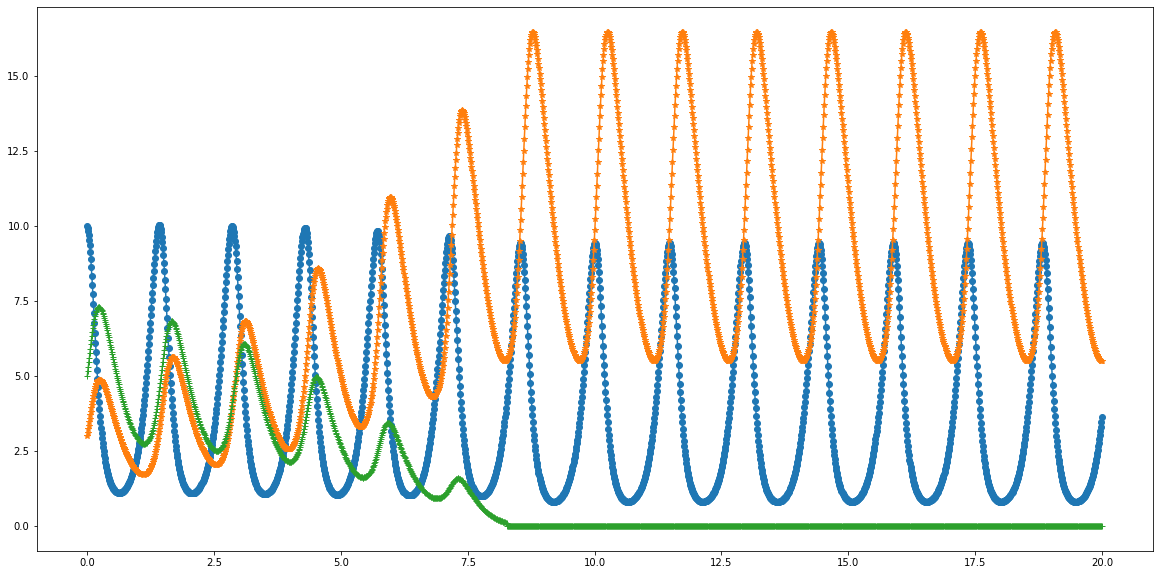

In [27]:
"""
t0 - stary time
t1 - end time
h - step
out[:, 0] - array with "grass"
out[:, 1] - "rabbits1"
out[:, 2] - "rabbits2"
"""
t0, t1, h = 0, 20, 0.01
out = rg4(f, t0, t1, np.array([10, 3, 5]), h)
t = np.linspace(t0, t1, int((t1 - t0) / h))
plt.figure(figsize = (20, 10))
plt.plot(t, np.array(out[:,0]), '-o');
plt.plot(t, np.array(out[:,1]), '-*');
plt.plot(t, np.array(out[:,2]), '-+');